# Activity 3: Rates of Convergence

In this activity we will apply our knowledge of Taylor series to explore rates of convergence.

**1. Implement functions to compute `n_terms` of the Taylor series for $ln(x)$ expanded about $x=1$ and $\sin{x}$ expanded about $x =0$.**

You may modify your work for the  $\sin{x}$ function from Activity 2.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def ln_taylor(x, n):
    # ln(x) expanded about x0=1: sum_{k=1}^n (-1)^(k+1) * (x-1)^k / k
    h = x - 1
    terms = [((-1)**(k+1) * (h**k) / k) for k in range(1, n+1)]
    return np.sum(terms)

def sin_taylor(x, n):
    # sin(x) expanded about x0=0: sum_{k=0}^n (-1)^k * x^(2k+1) / (2k+1)!
    from math import factorial
    terms = [((-1)**k * (x**(2*k+1)) / factorial(2*k+1)) for k in range(n)]
    return np.sum(terms)



**2. Use your functions to compute the approximation and ground truth of both functions at $x=1.5$ for `n_terms = 1`. Print the absolute and relative error of your calculation.**



In [8]:
# Points to evaluate
x_ln = 1.5
x_sin = 1.5
true_ln = np.log(x_ln)
true_sin = np.sin(x_sin)



**3. Now, overlay plots of relative error vs. `n_terms` for `n_terms` from 1 to 25.**

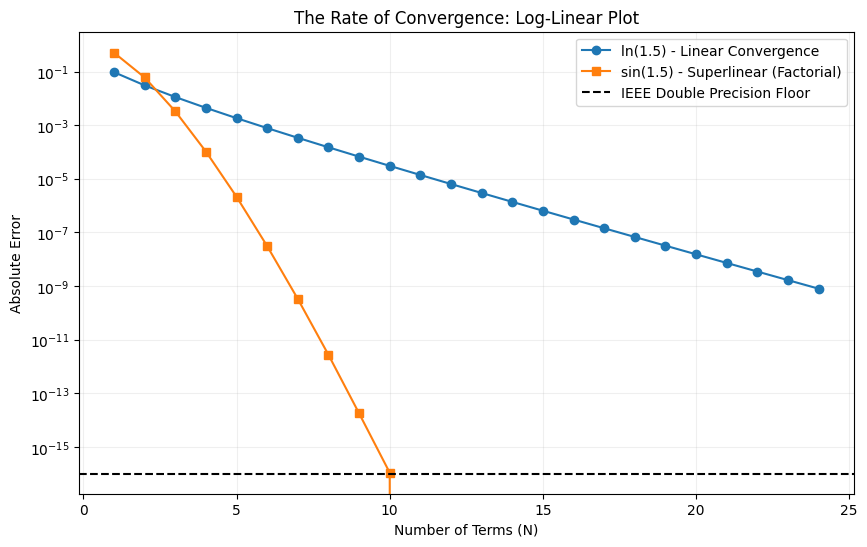

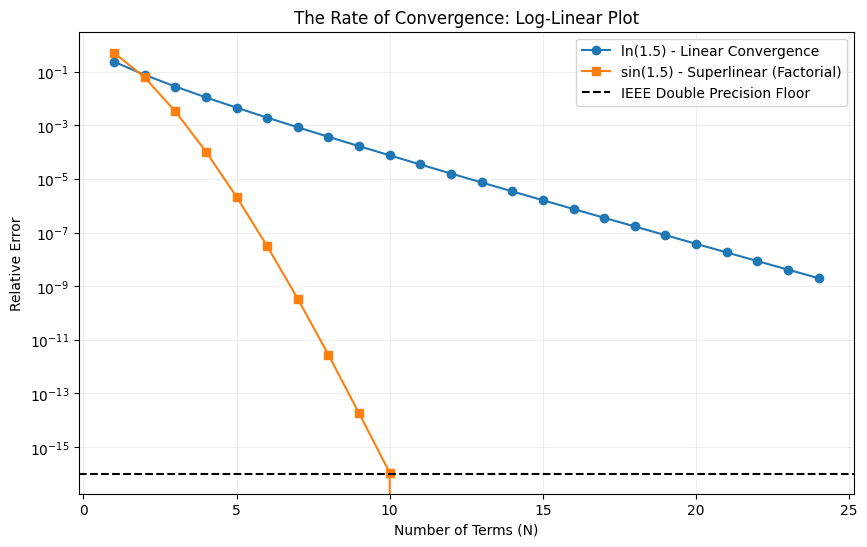

In [15]:
# Points to evaluate
x_ln = 1.5
x_sin = 1.5
true_ln = np.log(x_ln)
true_sin = np.sin(x_sin)

N_range = np.arange(1, 25)
err_ln = [abs(ln_taylor(x_ln, n) - true_ln) for n in N_range]
err_sin = [abs(sin_taylor(x_sin, n) - true_sin) for n in N_range]
relerr_ln = [abs(ln_taylor(x_ln, n) - true_ln)/true_ln for n in N_range]
relerr_sin = [abs(sin_taylor(x_sin, n) - true_sin)/true_sin for n in N_range]

plt.figure(figsize=(10, 6))
plt.semilogy(N_range, err_ln, 'o-', label='ln(1.5) - Linear Convergence')
plt.semilogy(N_range, err_sin, 's-', label='sin(1.5) - Superlinear (Factorial)')
plt.axhline(1e-16, color='k', linestyle='--', label='IEEE Double Precision Floor')
plt.xlabel('Number of Terms (N)')
plt.ylabel('Absolute Error')
plt.title('The Rate of Convergence: Log-Linear Plot')
plt.legend()
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.show()


plt.figure(figsize=(10, 6))
plt.semilogy(N_range, relerr_ln, 'o-', label='ln(1.5) - Linear Convergence')
plt.semilogy(N_range, relerr_sin, 's-', label='sin(1.5) - Superlinear (Factorial)')
plt.axhline(1e-16, color='k', linestyle='--', label='IEEE Double Precision Floor')
plt.xlabel('Number of Terms (N)')
plt.ylabel('Relative Error')
plt.title('The Rate of Convergence: Log-Linear Plot')
plt.legend()
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.show()

**Lastly, make the same plot for $x = 1.99$.** Describe your observations.

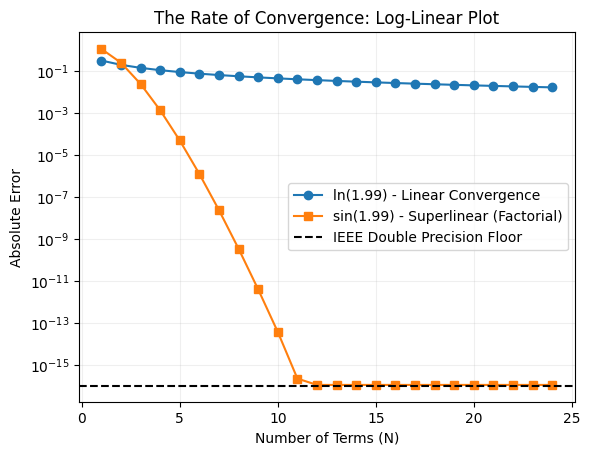

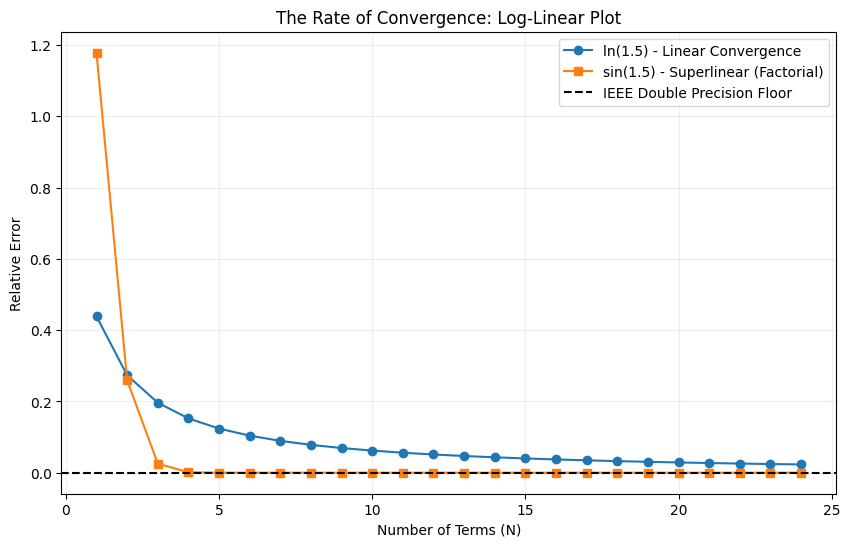

In [29]:
# Points to evaluate
x_ln = 1.99
x_sin = 1.99
true_ln = np.log(x_ln)
true_sin = np.sin(x_sin)


N_range = np.arange(1, 25)
err_ln = [abs(ln_taylor(x_ln, n) - true_ln) for n in N_range]
err_sin = [abs(sin_taylor(x_sin, n) - true_sin) for n in N_range]
relerr_ln = [abs(ln_taylor(x_ln, n) - true_ln)/true_ln for n in N_range]
relerr_sin = [abs(sin_taylor(x_sin, n) - true_sin)/true_sin for n in N_range]


plt.semilogy(N_range, err_ln, 'o-', label='ln(1.99) - Linear Convergence')
plt.semilogy(N_range, err_sin, 's-', label='sin(1.99) - Superlinear (Factorial)')
plt.axhline(1e-16, color='k', linestyle='--', label='IEEE Double Precision Floor')
plt.xlabel('Number of Terms (N)')
plt.ylabel('Absolute Error')
plt.title('The Rate of Convergence: Log-Linear Plot')
plt.legend()
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(N_range, relerr_ln, 'o-', label='ln(1.5) - Linear Convergence')
plt.plot(N_range, relerr_sin, 's-', label='sin(1.5) - Superlinear (Factorial)')
plt.axhline(1e-16, color='k', linestyle='--', label='IEEE Double Precision Floor')
plt.xlabel('Number of Terms (N)')
plt.ylabel('Relative Error')
plt.title('The Rate of Convergence: Log-Linear Plot')
plt.legend()
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.show()

**4. Order of convergence**

The order of convergence $\alpha$ is described by the following relationship:
$$\lim_{n \to \infty} \frac{|p_{n+1}-p|}{|p_{n} -p|^{\alpha}} = \lambda$$

We can investigate this behavior with our series by assuming $\alpha=1$ and computing $\lambda$ for each iteration in our sum.

Print a table 

In [27]:
import math
import pandas as pd
def get_convergence_table(x_val, max_n=20):
    # Setup Truth
    truth_ln = np.log(x_val)
    truth_sin = np.sin(x_val)
    
    results = []
    
    # We calculate the residuals (E_n) for each n
    for n in range(1, max_n + 1):
        # ln(x) brew
        h = x_val - 1
        brew_ln = sum([((-1)**(k+1) * (h**k) / k) for k in range(1, n+1)])
        err_ln = abs(truth_ln - brew_ln)
        
        # sin(x) brew
        # Note: sin terms are k=0,1,2... which corresponds to powers 1,3,5...
        # We'll map n to the number of terms included in the sum
        brew_sin = sum([((-1)**k * (x_val**(2*k+1)) / math.factorial(2*k+1)) for k in range(n)])
        err_sin = abs(truth_sin - brew_sin)
        
        results.append({
            'n': n,
            'E_n (ln)': err_ln,
            'E_n (sin)': err_sin
        })

    df = pd.DataFrame(results)
    
    # Compute the ratios: lambda = E_{n+1} / E_n
    df['Ratio (ln)'] = df['E_n (ln)'].shift(-1) / df['E_n (ln)']
    df['Ratio (sin)'] = df['E_n (sin)'].shift(-1) / df['E_n (sin)']
    
    return df.head(max_n - 1) # Trim last row because Ratio needs n+1

# Generate for our Tea Time values
x_eval = 1.5
table = get_convergence_table(x_eval)

# Formatting for a clean display in the notebook
print(f"--- Convergence Table for x = {x_eval} ---")
print(table.to_string(index=False, formatters={
    'E_n (ln)': '{:.2e}'.format,
    'E_n (sin)': '{:.2e}'.format,
    'Ratio (ln)': '{:.4f}'.format,
    'Ratio (sin)': '{:.4f}'.format
}))
print(f"{'N':>4} | {'$|p_{n}-p|$ sin':>18} | {'$|p_{n}-p|$ ln':>18}| {'Ratio sin':>18} | {'Ratio ln':>18} ")
print("-" * 90)

#example of printing variables
print(f"{N:>4} | {err_sin:>18.8e} | {err_ln:>18.8e} |  {ratio_sin:>18.8e} | {ratio_ln:>18.8e}")

--- Convergence Table for x = 1.5 ---
 n E_n (ln) E_n (sin) Ratio (ln) Ratio (sin)
 1 9.45e-02  5.03e-01     0.3223      0.1194
 2 3.05e-02  6.00e-02     0.3677      0.0548
 3 1.12e-02  3.29e-03     0.3949      0.0316
 4 4.42e-03  1.04e-04     0.4129      0.0206
 5 1.83e-03  2.14e-06     0.4257      0.0145
 6 7.78e-04  3.09e-08     0.4353      0.0107
 7 3.38e-04  3.32e-10     0.4426      0.0083
 8 1.50e-04  2.75e-12     0.4485      0.0066
 9 6.72e-05  1.82e-14     0.4533      0.0000
10 3.05e-05  0.00e+00     0.4573         inf
11 1.39e-05  1.11e-16     0.4606      1.0000
12 6.42e-06  1.11e-16     0.4635      1.0000
13 2.97e-06  1.11e-16     0.4660      1.0000
14 1.39e-06  1.11e-16     0.4681      1.0000
15 6.49e-07  1.11e-16     0.4700      1.0000
16 3.05e-07  1.11e-16     0.4717      1.0000
17 1.44e-07  1.11e-16     0.4732      1.0000
18 6.81e-08  1.11e-16     0.4746      1.0000
19 3.23e-08  1.11e-16     0.4758      1.0000
   N |    $|p_{n}-p|$ sin |     $|p_{n}-p|$ ln|          Ratio

NameError: name 'N' is not defined